In [1]:
import pandas as pd
import numpy as np

# Modelo Recurrentes con Embeddings a nivel de caracter

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Utilizando Tokenizer y pad_sequences de keras a nivel de caracter, obtener la entrada tokenizada. Por ejemplo:

**El smiles**:

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

**Tendría que quedar algo asi (puede que no sea exacto):**

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)
       

**Otro ejemplo:**
smiles: 'NC(=O)O'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

**Tener en cuenta:**

- Ver cuanta es la máxima longitud para agregar el padding correspondiente
- En el ejemplo se agrego padding a la izquierda

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_len_idx, min_len_idx

(2930, 595)

In [6]:
X = df['canonical_smiles']
y = df['pIC50']

In [7]:
max(y), min(y)

(18.0, -6.77)

In [8]:
max(X), min(X)

('c1nnc(-c2cc3c(cn2)[nH]c2ncc(-c4ccc(CN5CCCCC5)cc4)cc23)o1',
 'Br.BrCC1CN=C(Nc2ccccn2)S1')

In [9]:
# Implementar tokenización y guardar en X_seq_pad el dataset tokenizado

tokenizer = Tokenizer(filters='' , lower=False, char_level=True) #toma la C minuscula y mayuscula
tokenizer.fit_on_texts(X)

# Obtener nuestro Indice de palabras de datos de entrenamiento (--------------------------------------- CAMBIAR!)

word_index = tokenizer.word_index

#Codificar oraciones de datos de entrenamiento (--------------------------------------- CAMBIAR!)

X_seq = tokenizer.texts_to_sequences(X)

#Obtener la longitud maxima de la secuencoa de entrenamiento (--------------------------------------- CAMBIAR!)

max_len = max([len(x) for x in X_seq])

#Rellenar las secuencias de entrenamiento (--------------------------------------- CAMBIAR!)

pad_type = 'pre' #Rellena con 0 a la izquierda, para completar la secuencia
X_seq_pad = pad_sequences(X_seq, padding=pad_type, maxlen=max_len)
X_seq_pad = np.array(X_seq_pad)

In [10]:
# seguirrrr.....
# min 00:27:43
print("Word index: \n", word_index)
print("\nPadded training sequences: \n", X_seq_pad)
print("\nPadded traning shape: ", X_seq_pad.shape)
print("Training sequences data type: ", type(X_seq_pad))

print(X_seq_pad[max_len_idx])
print(X_seq_pad[min_len_idx])

Word index: 
 {'c': 1, 'C': 2, '(': 3, ')': 4, '1': 5, 'O': 6, '2': 7, 'N': 8, '=': 9, '3': 10, '[': 11, ']': 12, 'n': 13, '@': 14, '4': 15, 'H': 16, '-': 17, '/': 18, 'l': 19, '.': 20, '+': 21, 'F': 22, '5': 23, 'o': 24, 'B': 25, 'r': 26, 'S': 27, '\\': 28, '#': 29, 's': 30, '6': 31, 'I': 32, 'e': 33, 'P': 34, '7': 35, '8': 36, 'i': 37, 'a': 38}

Padded training sequences: 
 [[ 0  0  0 ...  4 24  5]
 [ 0  0  0 ...  2  2  5]
 [ 0  0  0 ...  1  1  5]
 ...
 [ 0  0  0 ...  5  6  2]
 [ 0  0  0 ...  1  5  6]
 [ 0  0  0 ...  7  9  6]]

Padded traning shape:  (5664, 207)
Training sequences data type:  <class 'numpy.ndarray'>
[ 2 11  2 14 14 12  5  7  2  2 11  2 14 16 12 10 11  2 14 12 15  3  2  4
  2  2  2 11  2 14 14 12 23  3  2  4  2  3  9  6  4  6  2  2 11  8 21 12
  3  2  4  3  2  4  2  2  2  2  2  2  2  2  2 11  8 21 12  3  2  4  3  2
  4  2  2  6  2  3  9  6  4 11  2 14 12 31  3  2  4  2  2  2 11  2 14 12
 35  3  2  4 11  2 14 14 16 12 31  2  2 11  2 14 14 12 31 36  2 11  2 14
 14 16 12

# Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(y_train), len(X_test)

(4531, 4531, 1133)

## Data Augmentation (No influye mucho)

In [14]:
X_train = np.vstack([X_train, X_train[:, ::-1]])

In [15]:
X_train.shape

(9062, 207)

In [16]:
y_train = np.hstack([y_train, y_train])

In [17]:
y_train.shape

(9062,)

# Network Model

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [19]:
# Métrica

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [20]:
# vocab_size = # Completar largo del vocabulario
vocab_size = len(word_index)
print(vocab_size)

38


In [21]:
max_sequence_len = X_seq_pad.shape[1] # Completar
print(max_sequence_len)

207


# Armar modelo en keras de LSTM
El de abajo es un ejemplo propuesto pero puede armar otro similar (siempre con LSTM o GRU)

In [22]:
cells = 100
return_sequences = False

model = Sequential()
# model.add(Embedding(vocab_size+1, 64, input_length= max_sequence_len))
# model.add(Embedding(vocab_size+1, 2, input_length= max_sequence_len)) #Probar reducir el vocabulario a 2
model.add(Embedding(vocab_size+1, 64, input_length= max_sequence_len))
model.add(Bidirectional(LSTM(cells, return_state= False, return_sequences=return_sequences, activation='tanh')))
# model.add(Dense(50, activation='linear'))
model.add(Dense(100, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(BatchNormalization())
# model.add(Dropout(0.8))
# model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 207, 64)           2496      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 50)                0

In [24]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [25]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=[X_test, y_test], callbacks=[])

Epoch 1/100
71/71 [==============================] - 123s 2s/step - loss: 12.1523 - R2: -3.6312 - val_loss: 24.9179 - val_R2: -7.8506
Epoch 2/100
71/71 [==============================] - 124s 2s/step - loss: 3.6239 - R2: -0.3868 - val_loss: 8.7413 - val_R2: -2.0894
Epoch 3/100
71/71 [==============================] - 129s 2s/step - loss: 2.3414 - R2: 0.1156 - val_loss: 3.4718 - val_R2: -0.2107
Epoch 4/100
71/71 [==============================] - 129s 2s/step - loss: 2.2770 - R2: 0.1432 - val_loss: 3.2255 - val_R2: -0.1010
Epoch 5/100
71/71 [==============================] - 129s 2s/step - loss: 2.2142 - R2: 0.1676 - val_loss: 30.5613 - val_R2: -9.7011
Epoch 6/100
71/71 [==============================] - 130s 2s/step - loss: 5.3672 - R2: -1.1312 - val_loss: 2.7915 - val_R2: 0.0500
Epoch 7/100
71/71 [==============================] - 131s 2s/step - loss: 2.6723 - R2: -0.0150 - val_loss: 4.5115 - val_R2: -0.5731
Epoch 8/100
71/71 [==============================] - 132s 2s/step - loss: 2.4

In [27]:
y_pred = model.predict(X_test)
y_pred

array([[5.4289236],
       [5.637434 ],
       [6.966179 ],
       ...,
       [5.0139594],
       [6.794742 ],
       [6.0516644]], dtype=float32)

# Score

In [28]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [29]:
r2
# 0.4984533246797399

0.5298963712857632

### Rsultados

#### 1er Modelo: Embed_64_bi_lstm_100_dense_50_drop(0.8) ---> R2 = 0.6005000020829785
#### 2er Modelo: Embed_19_bi_lstm_100_dense_50_drop(0.8) ---> R2 = 0.5729760029559614
#### 3er Modelo: Embed_10_bi_lstm_100_dense_128_drop(0.8) ---> R2 = 0.5298963712857632
#### 4to Modelo: Embed_64_bi_lstm_100_dense_50_drop08_pre_lr001 --> val_R2 = 0.5703483144323962
#### 5to Modelo: Embed_64_bi_lstm_100_dense_50_drop08_pre_lr01 --> val_R2 = 0.6302058543334299
#### 6to Modelo: Embed_64_bi_lstm_100_dense_50_drop08_pre_lr05_ep27 -> val_R2 = -2.3896734968609223e-07
#### 7mo Modelo: Embed_32_bi_lstm_100_dense_50_drop08_pre_lr01_ep50 -> val_R2 = 0.6033206693160067

In [30]:
# model.save('models/embed_64_bi_lstm_100_dense_50_bn.h5', )

# Load model (solo si se grabo el modelo)

In [31]:
from tensorflow.keras.models import load_model

In [32]:
# model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [33]:
#y_pred = model_loaded.predict(X_test)

In [34]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.5298963712857632

¿Hasta que valores de r2 logró?

# Evaluación

In [35]:
# ! pip install seaborn

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

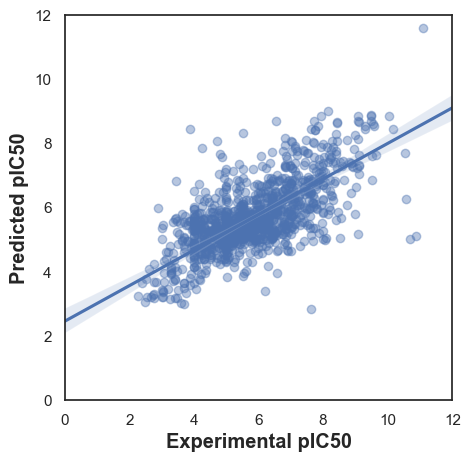

In [37]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

## TSNE

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [39]:
embeddings = model.layers[0].get_weights()[0][1:]

In [40]:
embeddings.shape

(38, 10)

In [41]:
tsne = TSNE(2)
x_2d = tsne.fit_transform(embeddings)

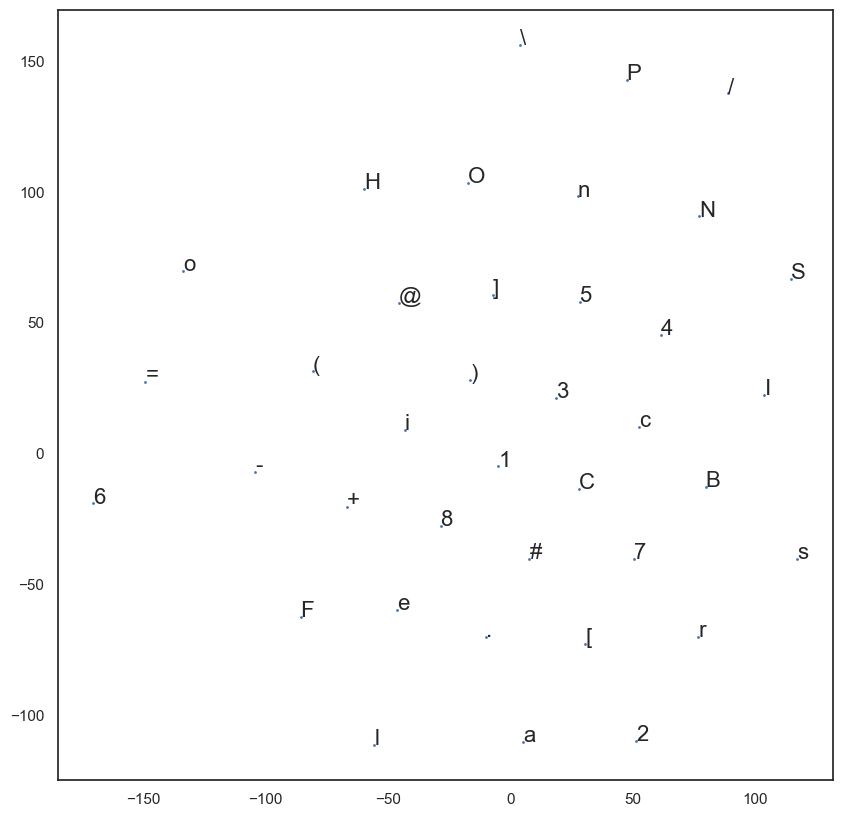

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(x_2d[:, 0], x_2d[:, 1], s= 1)
for i, t in enumerate(word_index):
    plt.text(x_2d[i, 0], x_2d[i, 1], t, fontsize=16)
    
plt.show()